In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping


Using TensorFlow backend.


In [0]:
import os


img_width, img_height = 224, 224
train_data_dir = "/content/drive/My Drive/train_AI_new"
validation_data_dir = "/content/drive/My Drive/validation_AI_new"

train_samples = [len(os.listdir(train_data_dir+'/'+i)) for i in sorted(os.listdir(train_data_dir))]
nb_train_samples = sum(train_samples)

validation_samples = [len(os.listdir(validation_data_dir+'/'+i)) for i in sorted(os.listdir(validation_data_dir))]
nb_validation_samples = sum(validation_samples)

#nb_train_samples = 1472
#nb_validation_samples = 159 
batch_size = 16
epochs = 100

In [0]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))


Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 1s 0us/step


In [0]:
for layer in model.layers[:5]:
    layer.trainable = False

In [0]:
from keras.regularizers import l2
x = model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
# x = Dense(512, activity_regularizer=l2(0.001), activation="relu")(x)
# x = Dropout(0.55)(x)
predictions = Dense(1, activation="sigmoid")(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model_final = Model(input = model.input, output = predictions)
# model_final.load_weights("/content/drive/My Drive/frozen_sgd.h5")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:

from keras.utils.vis_utils import plot_model
model_final.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=1e-4,momentum=0.9), metrics=["accuracy"])
# plot_model(model_final, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
shear_range=0.2,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.2,
width_shift_range = 0.2,
height_shift_range=0.2,
rotation_range=20)

In [0]:

test_datagen = ImageDataGenerator(
rescale = 1./255,
shear_range=0.2,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.2,
width_shift_range = 0.2,
height_shift_range=0.2,
rotation_range=20)


In [0]:
path = '/content/drive/My Drive/image_aug'
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "binary")

Found 1353 images belonging to 2 classes.


In [0]:

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,shuffle=True,batch_size = batch_size, 
target_size = (img_height, img_width),
class_mode = "binary")

Found 326 images belonging to 2 classes.


In [0]:
checkpoint = ModelCheckpoint("/content/frozen_sgd.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=15, verbose=1, mode='auto')


In [0]:
history = model_final.fit_generator(
train_generator,
steps_per_epoch = nb_train_samples//batch_size,
epochs = 150,
validation_data = validation_generator,
validation_steps = nb_validation_samples//batch_size,
callbacks = [checkpoint, early])

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
84/84 [==============================] - 431s 5s/step - loss: 0.5850 - acc: 0.6853 - val_loss: 0.3256 - val_acc: 0.8781

Epoch 00001: val_acc improved from -inf to 0.87813, saving model to /content/frozen_sgd.h5
Epoch 2/150
84/84 [==============================] - 43s 515ms/step - loss: 0.3069 - acc: 0.8729 - val_loss: 0.2584 - val_acc: 0.9129

Epoch 00002: val_acc improved from 0.87813 to 0.91290, saving model to /content/frozen_sgd.h5
Epoch 3/150
84/84 [==============================] - 41s 491ms/step - loss: 0.2285 - acc: 0.9111 - val_loss: 0.2127 - val_acc: 0.9355

Epoch 00003: val_acc improved from 0.91290 to 0.93548, saving model to /content/frozen_sgd.h5
Epoch 4/150
84/84 [==============================] - 41s 494ms/step - loss: 0.1914 - acc: 0.9235 - val_loss: 0.1351 - val_acc: 0.9581

Epoch 00004: val_acc improved from 0.93548 to 0.95806, saving model to /content/frozen_sgd.h5
Epoch 5/150
84/84 [======================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


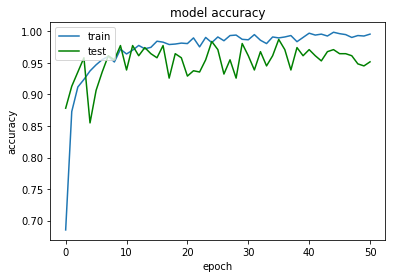

In [0]:

print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'],'g')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

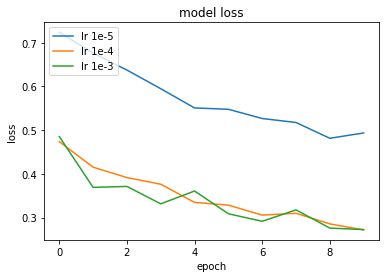

In [0]:
plt.plot(history.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['lr 1e-5', 'lr 1e-4', 'lr 1e-3'], loc='upper left')
plt.show()

In [0]:
history2 = model_final.fit_generator(
train_generator,
steps_per_epoch = nb_train_samples//batch_size,
epochs = 20,
validation_data = validation_generator,
validation_steps = nb_validation_samples//batch_size,
callbacks = [checkpoint])

Epoch 1/20
84/84 [==============================] - 37s 442ms/step - loss: 0.1303 - acc: 0.9511 - val_loss: 0.2622 - val_acc: 0.9000

Epoch 00001: val_acc did not improve from 0.96562
Epoch 2/20
84/84 [==============================] - 33s 396ms/step - loss: 0.1175 - acc: 0.9554 - val_loss: 0.1931 - val_acc: 0.9226

Epoch 00002: val_acc did not improve from 0.96562
Epoch 3/20
84/84 [==============================] - 34s 405ms/step - loss: 0.1316 - acc: 0.9464 - val_loss: 0.2120 - val_acc: 0.9129

Epoch 00003: val_acc did not improve from 0.96562
Epoch 4/20
84/84 [==============================] - 34s 404ms/step - loss: 0.1303 - acc: 0.9481 - val_loss: 0.1553 - val_acc: 0.9258

Epoch 00004: val_acc did not improve from 0.96562
Epoch 5/20
84/84 [==============================] - 33s 398ms/step - loss: 0.1336 - acc: 0.9479 - val_loss: 0.3004 - val_acc: 0.8581

Epoch 00005: val_acc did not improve from 0.96562
Epoch 6/20
84/84 [==============================] - 35s 411ms/step - loss: 0.121

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

folder_path = '/content/drive/My Drive/test_AI_new/dent'
# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = image.load_img(folder_path+'/'+img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)



In [0]:
folder_path = '/content/drive/My Drive/test_AI_new/No dent'
for img in os.listdir(folder_path):
    img = image.load_img(folder_path+'/'+img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

In [0]:
np.save(open('/content/drive/My Drive/validation_set.npy', 'wb'),images)

In [0]:
validation_data = np.load(open('/content/drive/My Drive/validation_set.npy', 'rb'))
validation_labels =  np.array([0] * 27 + [1] * 26)

In [0]:
classes = []
res=[]
for i in validation_data:
  preds = model_final.predict(i)
  classes.append(preds)

for i in classes:
  if i<0.5:
    res.append(0)
  else:
    res.append(1)  

In [0]:
np.mean(res==validation_labels)

0.9245283018867925

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


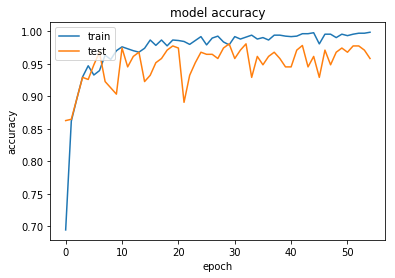

In [0]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

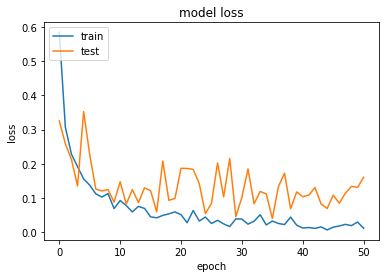

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


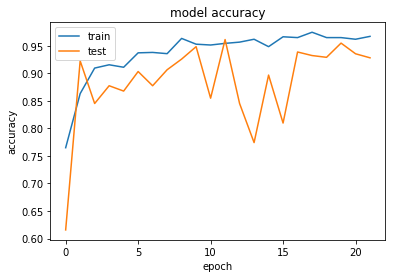

In [0]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

folder_path = '/content/drive/My Drive/validation_AI_new/Dent'
model_final.load_weights("/content/drive/My Drive/imagenew_sgd1.h5")
img_width, img_height = 224,224

In [0]:

# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = image.load_img(folder_path+'/'+img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)



In [0]:
folder_path = '/content/drive/My Drive/validation_AI_new/No Dent'
for img in os.listdir(folder_path):
    img = image.load_img(folder_path+'/'+img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

In [0]:
np.save(open('/content/drive/My Drive/validation_set.npy', 'wb'),images)

In [0]:
validation_data = np.load(open('/content/drive/My Drive/validation_set.npy', 'rb'))
validation_labels = np.array([0] * 176 + [1] * 150)

In [0]:
classes = []
for i in validation_data:
  preds = model_final.predict(i)
  classes.append(preds)

In [0]:
res = []
for i in classes:
  if i<0.5:
    res.append(0)
  else:
    res.append(1)

In [0]:
np.mean(res==validation_labels)

0.9233128834355828

In [0]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(validation_labels, res)
cm_df = pd.DataFrame(cm.T, index=['Dent', 'No Dent'], columns=['Dent', 'No Dent'])
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       Dent  No Dent
Predicted               
Dent        151        0
No Dent      25      150


In [0]:
#27 dent #26 no dent
folder_path = '/content/drive/My Drive/test_AI_new/dent'

# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = image.load_img(folder_path+'/'+img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)


In [0]:
folder_path = '/content/drive/My Drive/test_AI_new/No dent'
for img in os.listdir(folder_path):
    img = image.load_img(folder_path+'/'+img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

In [0]:
np.save(open('/content/drive/My Drive/test_set.npy', 'wb'),
            images)


In [0]:
test_data = np.load(open('/content/drive/My Drive/test_set.npy', 'rb'))
print(test_data.shape)
test_labels = np.array([0] * 27 + [1] * 26)

(53, 1, 224, 224, 3)


In [0]:
classes_2 = []
for i in test_data:
  preds = model_final.predict(i)
  classes_2.append(preds)

In [0]:
res_2 = []
for i in classes_2:
  if i<0.5:
    res_2.append(0)
  else:
    res_2.append(1)

In [0]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(test_labels, res_2)
cm_df = pd.DataFrame(cm.T, index=['Dent', 'No Dent'], columns=['Dent', 'No Dent'])
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       Dent  No Dent
Predicted               
Dent         27        0
No Dent       0       26
